# Download and look into the data

## Project description

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

**Interconnect's services**

Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, *digital subscriber line*) or through a fiber optic cable.

Some other services the company provides include:

- Internet security: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*)
- A dedicated technical support line (*TechSupport*)
- Cloud file storage and data backup (*OnlineBackup*)
- TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

### Import needed libraries

In [121]:
# Data tools
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport

# others
import time
from functools import reduce
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from copy import deepcopy

# Graphics and display
from IPython.core.interactiveshell import InteractiveShell
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline

# Ml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, \
roc_auc_score, recall_score, precision_score, accuracy_score
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
! pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# Statistics
from scipy.stats import randint

print('Project libraries has been successfully been imported!')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Project libraries has been successfully been imported!


1.0.3  Set environment variables

In [122]:
# set to display all output not only print() or last output
InteractiveShell.ast_node_interactivity = "all"

# set display all columns when showing dataframes
pd.options.display.max_columns = None    

1.1  Open the file and look into the data.

In [123]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
import glob

for name in glob.glob(r'/content/drive/MyDrive/churn_gm/*'):
    print(name)

/content/drive/MyDrive/churn_gm/phone.csv
/content/drive/MyDrive/churn_gm/contract.csv
/content/drive/MyDrive/churn_gm/internet.csv
/content/drive/MyDrive/churn_gm/personal.csv
/content/drive/MyDrive/churn_gm/telecom_project_main_for_randomizedcv.ipynb
/content/drive/MyDrive/churn_gm/practicum100-telecom-churn-prediction.ipynb
/content/drive/MyDrive/churn_gm/Copy of telecom_project_main.ipynb
/content/drive/MyDrive/churn_gm/backup_22.11.22_telecom_project_main_v1.ipynb
/content/drive/MyDrive/churn_gm/backup_telecom_project_main_v1.ipynb
/content/drive/MyDrive/churn_gm/telecom_project_main_v1.ipynb
/content/drive/MyDrive/churn_gm/telecom_project_main_v2.ipynb
/content/drive/MyDrive/churn_gm/telecom_project_main_v3.ipynb


In [125]:
try:
    contract = pd.read_csv('contract.csv')
    internet = pd.read_csv('internet.csv')
    personal = pd.read_csv('personal.csv')
    phone = pd.read_csv('phone.csv')
    
except:
    contract = pd.read_csv('/content/drive/MyDrive/churn_gm/contract.csv')
    internet = pd.read_csv('/content/drive/MyDrive/churn_gm/internet.csv')
    personal = pd.read_csv('/content/drive/MyDrive/churn_gm/personal.csv')
    phone = pd.read_csv('/content/drive/MyDrive/churn_gm/phone.csv')


contract.name = 'contract'
internet.name = 'internet'
personal.name = 'personal'
phone.name = 'phone'

    
print('Data has been read correctly!')

Data has been read correctly!


### Looking at the data

In [126]:
# display basic information about each of the dataframes we use
for df in [contract, internet, personal, phone]:
    df.name
    df.info()
    df.sample(2)
    print()
    print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
    print()

'contract'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3005,0516-QREYC,2018-02-01,No,Month-to-month,Yes,Mailed check,20.30,459.95
1370,7596-IIWYC,2017-11-01,No,Two year,Yes,Bank transfer (automatic),20.25,538.2



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



'internet'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
642,3174-AKMAS,DSL,No,Yes,No,Yes,Yes,No
4743,4523-WXCEF,Fiber optic,No,Yes,No,No,Yes,Yes



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



'personal'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
6126,9190-MFJLN,Male,1,No,No
4586,7569-NMZYQ,Female,0,Yes,Yes



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



'phone'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
4535,4816-JBHOV,No
5291,3161-GETRM,Yes



@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



In [127]:
frac_No_for_ballance = len(contract[contract['EndDate'] == 'No']) / len(contract['EndDate'])
print('The "No" precent in the EndDate column (target) is: {:.0%}'.format(frac_No_for_ballance))

The "No" precent in the EndDate column (target) is: 73%


##  Data describe notes

#### Special function for data describe

In [128]:
# Checking 0's
def zero_check(df):
    for i in df:
        print(i,len(df[df[i]==0]))
        
# function to determine if columns in file have null values        
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('{} has {} nulls, which is {:.{}%} percent of Nulls'.format(column, num_of_nulls, percent, num))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")       
        
# function to display general information about the dataset
def general_info(df):
    print("\033[1m" + "\033[0m")
    display(pd.concat([df.dtypes, df.count(),df.isna().sum(),df.isna().sum()*100/len(df)], keys=['type','count','na','na%'],
                      axis=1))
    print()
    print("\033[1m" + 'Head:')  
    display(df.head())
    print()
    print("\033[1m" + 'Tail:')
    display(df.tail())
    print()
    print("\033[1m" + 'Info:')
    print()
    display(df.info())
    print()
    print("\033[1m" + 'Describe:')
    print()
    display(df.describe())
    print()
    print("\033[1m" + 'Describe include: all :')
    print()
    display(df.describe(include='all'))
    print()
    print("\033[1m" + 'nulls in the columns:')
    print()
    display(get_percent_of_na(df, 4))  # check this out
    print()
    print("\033[1m" + 'Zeros in the columns:') 
    print()
    display(zero_check(df))
    print()
    print("\033[1m" + 'Shape:', df.shape)
    print()
    print()
    print('Duplicated:',"\033[1m" + 'We have {} duplicated rows\n'.format(df.duplicated().sum()) + "\033[0m")
    print()
    print("\033[1m" + 'Dtypes:')  
    display(df.dtypes)
    print()

# Preprocessing

## Merge data bases

In [129]:
# merge all dataframes

# compile the list of dataframes you want to merge
data_frames = [contract, internet, personal, phone]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['customerID'],
                                            how='outer'), data_frames)


In [130]:
df_merged.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
5599,2344-JMOGN,2019-01-01,2019-10-01 00:00:00,Month-to-month,Yes,Mailed check,94.85,890.6,Fiber optic,No,Yes,Yes,Yes,Yes,No,Male,0,Yes,No,No
5882,2138-VFAPZ,2018-12-01,No,Two year,Yes,Mailed check,19.70,263.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,0,Yes,Yes,No
407,0111-KLBQG,2017-06-01,No,Month-to-month,Yes,Mailed check,93.95,2861.45,Fiber optic,No,Yes,No,No,Yes,Yes,Male,1,Yes,Yes,No
2988,6295-OSINB,2014-02-01,No,Two year,Yes,Electronic check,109.65,7880.25,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Male,0,Yes,No,Yes
2469,4716-MRVEN,2017-09-01,No,One year,No,Mailed check,20.00,599.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,0,No,No,No


In [131]:
get_percent_of_na(df_merged, 4)

InternetService has 1526 nulls, which is 21.6669% percent of Nulls
OnlineSecurity has 1526 nulls, which is 21.6669% percent of Nulls
OnlineBackup has 1526 nulls, which is 21.6669% percent of Nulls
DeviceProtection has 1526 nulls, which is 21.6669% percent of Nulls
TechSupport has 1526 nulls, which is 21.6669% percent of Nulls
StreamingTV has 1526 nulls, which is 21.6669% percent of Nulls
StreamingMovies has 1526 nulls, which is 21.6669% percent of Nulls
MultipleLines has 682 nulls, which is 9.6834% percent of Nulls
There are 8 columns with NA.


## Fill nan


In [132]:
# fill the nan values from internet database
internet_columns = internet.columns.to_list()[1:]
print('The values in each column in original internet data base')
print('---------------------------------------------------------')
print()
for column in internet_columns:
    print(column)
    print(internet[column].unique())
    print()


The values in each column in original internet data base
---------------------------------------------------------

InternetService
['DSL' 'Fiber optic']

OnlineSecurity
['No' 'Yes']

OnlineBackup
['Yes' 'No']

DeviceProtection
['No' 'Yes']

TechSupport
['No' 'Yes']

StreamingTV
['No' 'Yes']

StreamingMovies
['No' 'Yes']



I will fill No in all the nan for these columns 

In [133]:
df_merged[internet_columns] = df_merged[internet_columns].fillna(value='No')

In [134]:
get_percent_of_na(df_merged, 4)

MultipleLines has 682 nulls, which is 9.6834% percent of Nulls
There are 1 columns with NA.


In [135]:
# fill the nan values in MultipleLines column

phone_columns = phone.columns.to_list()[1:]
print('The values in each column in original phone data base')
print('---------------------------------------------------------')
print()
for column in phone_columns:
    print(column)
    print(phone[column].unique())
    print()


The values in each column in original phone data base
---------------------------------------------------------

MultipleLines
['No' 'Yes']



I will replace this with num_of_lines
- 0 for nan
- 1 for 1 line (MultipleLines = No)
- 1 for more than 1 line (MultipleLines = Yes)

In [136]:
df_merged['MultipleLines'] = df_merged['MultipleLines'].replace(
    {'No': 1, 'Yes':2}
).fillna(value=0)

In [137]:
get_percent_of_na(df_merged, 4)


There are no columns with NA.


## Change columns names

In [138]:
column_list = ['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines']

In [139]:
[column.lower() for column in column_list]

['customerid',
 'begindate',
 'enddate',
 'type',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'multiplelines']

In [140]:
df_merged.columns = ['customer_id',
 'begin_date',
 'end_date',
 'type',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'multiple_lines']

In [141]:
df_merged.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines'],
      dtype='object')

## Convert type

### Date

In [142]:
# to datetime
df_merged['begin_date'] = pd.to_datetime(df_merged['begin_date'], format='%Y.%m.%d')

### Numerical

In [143]:
# convert to numerical
df_merged['total_charges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: total_charges, Length: 6531, dtype: int64

replace the ' '  with 0

In [144]:
df_merged['total_charges'] = df_merged['total_charges'].replace(to_replace=' ', value='0')

In [145]:
df_merged['total_charges'].value_counts()

0         11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: total_charges, Length: 6531, dtype: int64

In [146]:
# to numeric
df_merged['total_charges'] = df_merged['total_charges'].astype(float)

### Categorical

In [147]:
column_to_categorical = ['type', 'paperless_billing', 'payment_method', 'internet_service',
 'online_security', 'online_backup','device_protection', 'tech_support', 'streaming_tv',
 'streaming_movies', 'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines']

In [148]:
for column in column_to_categorical:
    df_merged[column] = df_merged[column].astype('category')

### create churn feature

In [149]:
def churn_0_1(row):
    """
    return 0 if user still on the service and 1 if user churned
    """
    end_date = row['end_date']
    if end_date == 'No':
        return 0
    else:
        return 1

In [150]:
df_merged['churn'] = df_merged.apply(churn_0_1, axis=1)

In [151]:
df_merged.sample(2)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,churn
5046,7252-NTGSS,2020-01-01,No,Month-to-month,No,Mailed check,45.15,45.15,DSL,No,No,No,No,No,No,Female,0,No,No,1.0,0
5642,2320-TZRRH,2018-06-01,No,One year,No,Mailed check,19.50,403.15,No,No,No,No,No,No,No,Female,0,No,No,1.0,0


# EDA 


### Categorical feature differences correlating with churned status

In [152]:

def check_categorical_features(df, features, cols=3):
    """
    this function displays bar charts comparing the churned population with the non churned population
    """

    # count number of subplots needed
    num_of_features = len(features)
    rows = round(num_of_features/cols)

    # figure size depends on number of rows
    height = rows*6
    width = 15

    # create subplots
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(width, height), sharey='row')

    # fill subplots
    for f, f_ax in zip(features, ax.ravel()):
        pd.crosstab(index=df[f], columns=df['churn'], normalize='columns').plot(kind='bar', ax=f_ax, title=f).set_xlabel('')
        f_ax.set_ylabel('Proportion')
    plt.setp(ax, ylim=[0,1])
    plt.tight_layout()

In [153]:
categorical_features = ['gender', 'senior_citizen', 'partner', 'dependents',
       'type', 'paperless_billing', 'payment_method', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines']

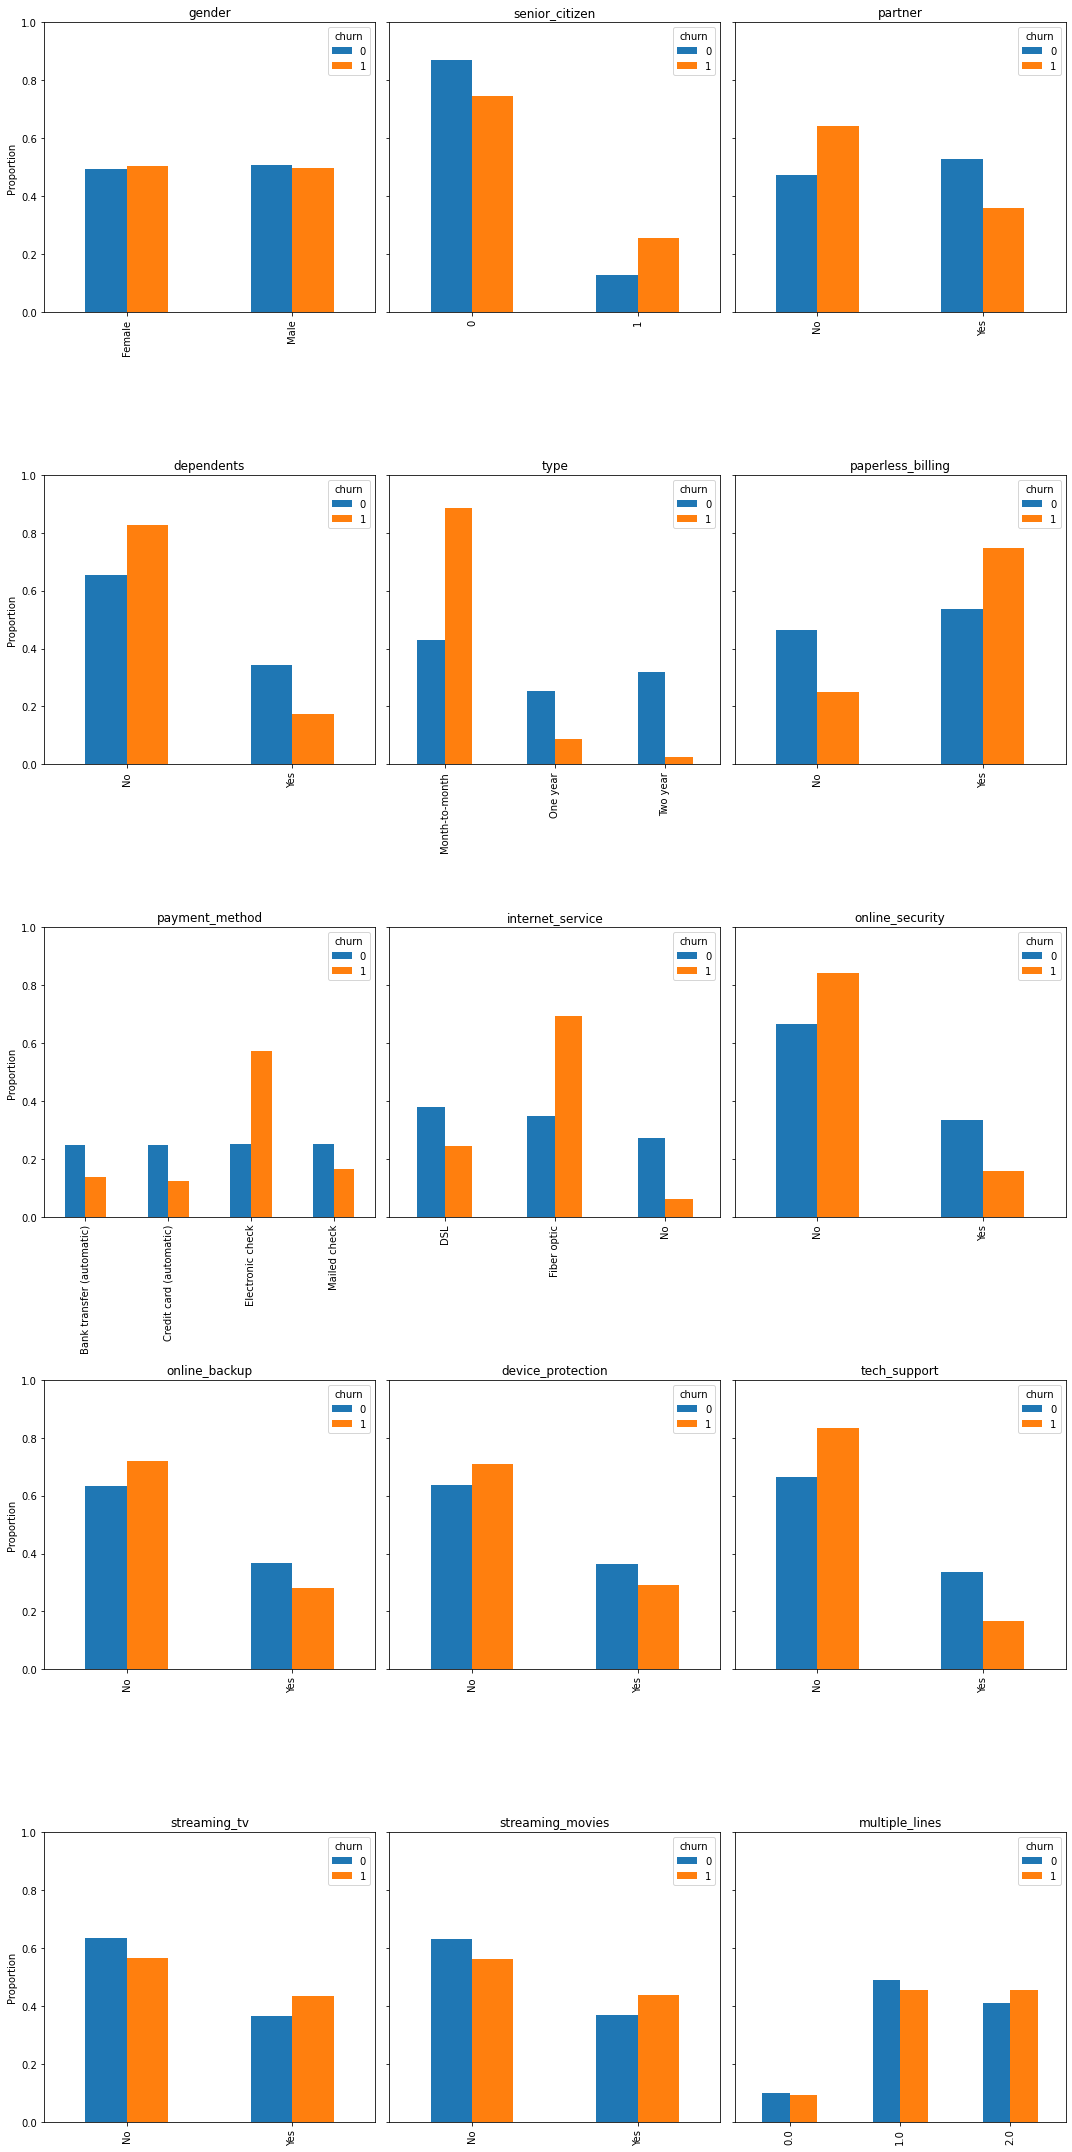

In [154]:
check_categorical_features(df_merged, categorical_features)

We can see that some features distributed the same or close to the same for churned and non-churned users, while others vary more widely. It is important to remember that these are correlations only, we do not know if that the cause for leaving the telecom provider.

* `gender` - no difference between churned and non-churned.
* `senior_citizen` - we have a higher percentage of senior citizens in the churned group.
* `partner` - we have a higher percentage of singles in the churned group.
* `dependents` - we have a higher percentage of users without dependents in the churned group.
* `type` - churned users belonged mainly to the month-to-month package.
* `paperless_billing` - we have a higher percentage of users using paperless billing in the churned group.
* `payment_method` - churned users belonged mainly to the electronic check payment method.
* `internet_service` - churned users belonged mainly to the fiber optic internet service
* `online_security` - we have a higher percentage of churned users not use the online security service.
* `online_backup` - we have a somewhat higher percentage of churned users not use the online backup service.
* `device_protection` - we have a somewhat higher percentage of churned users not use the device protection service.
* `tech_support` - we have a higher percentage of churned users not use the tech support service.
* `streaming_tv` - we have a somewhat higher percentage of churned users use the TV streaming service.
* `streaming_movies` - we have a somewhat higher percentage of churned users use the movie streaming service.
* `multiple lines` - almost no difference between churned and non-churned users.

If we are resource restricted, it would be possible to remove the features which differ very slightly or not at all between the two groups from the modeling. It is not the case here so we will leave these in for now.

### Quantitative feature differences correlating with churned status

Now that we have looked at the categorical features, it's interesting also to look at the distribution of quantitative features between the two groups. The features we can look at here are the begin_date, monthly_charges and total_charges.

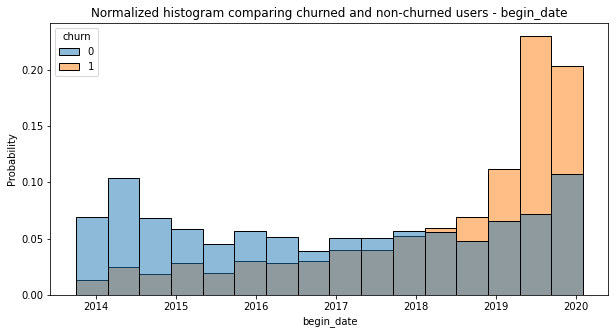

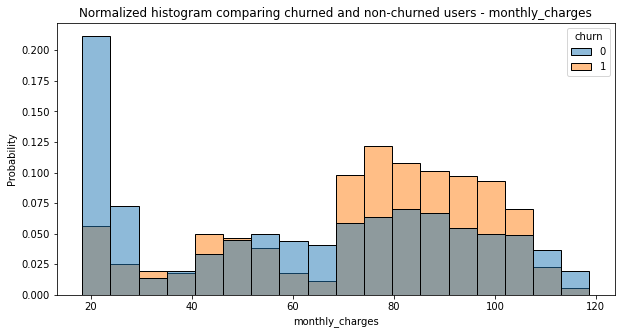

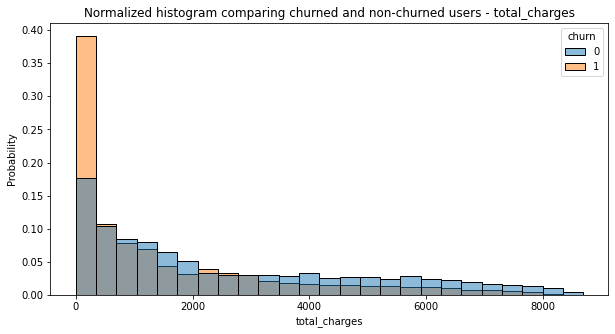

In [155]:
# plot normalized distribution for the 3 quantitative features
for feat in ['begin_date', 'monthly_charges', 'total_charges']:

    # create figure
    plt.figure(figsize=(10,5))
    
    # plot the histogram
    sns.histplot(df_merged, x=feat, hue='churn', stat='probability', common_norm=False)
    
    # add title
    plt.title('Normalized histogram comparing churned and non-churned users - ' + str(feat))
    plt.show()
    
print(); # suppress unneeded output relating to figure creation etc.

We can see that the two groups are obviously different.

* `begin_date` - on average, churned users are more recent joiners than non-churned users.
* `monthly_charges` - we can see that a large proportion of churned users had high monthly payments compared to non-churned users.
* `total_charges` - we can see that churned users have a much higher percentage of them in the lowest bin. This can probably be explained by the fact that most churned users are recent users (so less monthly number of charges). It could also have also been explained by the fact that these users left so in general they payed for less months than similar users who didn't leave, except that all the churning occurred in the last 4 months of the dataset.

### Statistical correlation of features

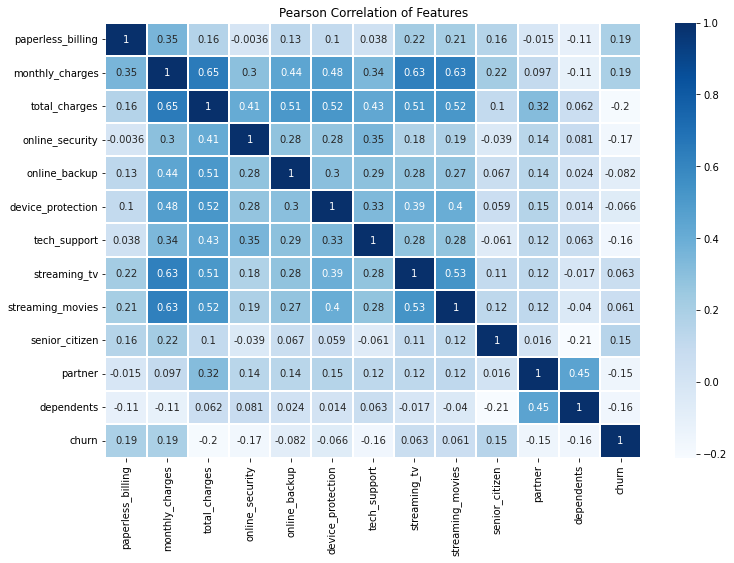

In [156]:
# create dataframe copy before performing changes.
df_copy = df_merged.copy()

# convert boolean columns to boolean type so they will appear in the matrix
for c in categorical_features:
    options = df_copy[c].unique()
    
    if sorted(options) == ['No', 'Yes']:
        df_copy[c] = (df_copy[c] == 'Yes').astype('boolean')
    elif sorted(options) == [0, 1]:
        df_copy[c] = (df_copy[c] == 1).astype('boolean')

corr = df_copy.corr()

f, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(corr, cmap="Blues", annot=True, square=False, ax=ax,  linewidth = 1)
plt.title('Pearson Correlation of Features')
plt.yticks(rotation=0);

<ins>Correlation of features with churned status</ins> 

Of the numerical and boolean types we could analyse this way, we can see that the largest correlation factors exist for the features we already noticed above. High monthly charges correlate with churning, and so does the use of paperless billing, being a senior_citizen. On the negative size, the highest correlations with churning exist for low total charges, no online security plan, no tech support, no dependents and no having partner. Still, all these 1 vs 1 correlations have an absolute Pearson factor of < 0.2, which is not very impressive, but noticeable.

<ins>Other noteworthy correlation of features</ins> 

Streaming_tv and streaming_movies are both highly correlated with each other and with charges (monthly and total) also device protection and online backup. It is obvious that extra services elavate the price. Monthly and total charges correlate with each other. this make sence and the relation is the lengh of use which we will extract later for feature engineering. 



### Time series exploration

In [157]:
def churn_0_1_raw(row):
    end_date = row['EndDate']
    if end_date == 'No':
        return 0
    else:
        return 1

In [158]:
try:
    df_time_series = pd.read_csv('contract.csv', index_col=['BeginDate'], parse_dates=['BeginDate'])
    
except:
    df_time_series = pd.read_csv('/content/drive/MyDrive/churn_gm/contract.csv', index_col=['BeginDate'], parse_dates=['BeginDate'])


df_time_series.sort_index(inplace=True)

In [159]:
df_time_series['churn'] = df_time_series.apply(churn_0_1_raw, axis=1)
df_time_series = df_time_series.drop(['customerID', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'], axis=1)

Yearly seasonal


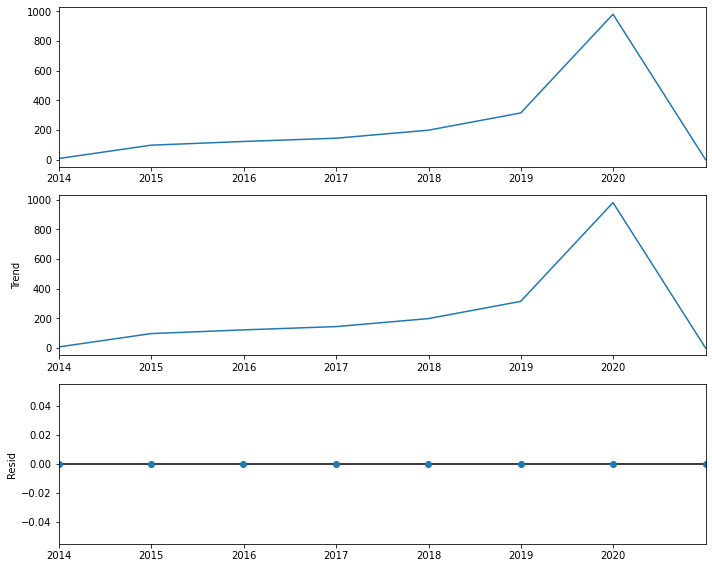

In [160]:
df_time_series_Y = df_time_series.resample('1Y').sum()
result_Y = seasonal_decompose(df_time_series_Y, model='additive')
fig = result_Y.plot(seasonal=False)
fig.set_size_inches((10, 8))
# Tight layout to realign things
fig.tight_layout()
print('Yearly seasonal')
plt.show()

We see general increase in churn over years. will add it also as a feature. 

Let's check the seasonality over month.

Monthly seasonal all years


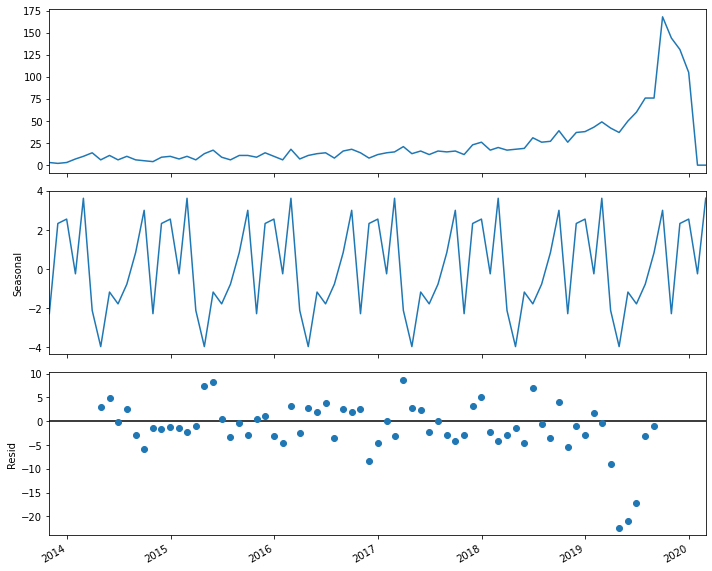

In [161]:
df_time_series_M = df_time_series['2015-01':'2020-01']
df_time_series_M = df_time_series.resample('1M').sum()
result_M = seasonal_decompose(df_time_series_M, model='additive')
fig= result_M.plot(
    observed=True,
    seasonal=True,
    trend=False,
    resid=True,
    weights=False
)
fig.set_size_inches((10, 8))
fig.autofmt_xdate()

# Tight layout to realign things
fig.tight_layout()
print('Monthly seasonal all years')
plt.show()

There is a clear seasonality with the month so we will add it also as a feature

# Feature engineering

## Add new features

In [162]:
# change to yes no the senior_citizen
df_merged['senior_citizen'] = df_merged['senior_citizen'].replace(to_replace={0:'No', 1:'Yes'})

In [163]:
# create new boolean column
df_merged['Male'] = df_merged['gender'].replace(to_replace={'Female':'No', 'Male':'Yes'})

In [164]:
features_for_ohe_yes_no = [
   'paperless_billing', 'online_security', 'online_backup', 'device_protection',
   'tech_support', 'streaming_tv', 'streaming_movies', 'senior_citizen',
   'partner', 'dependents', 'Male'
]

In [165]:
# change all yes no to 1 0
df_merged[features_for_ohe_yes_no] = df_merged[features_for_ohe_yes_no].replace(
    to_replace={'No':0, 'Yes':1}
)

In [166]:
# OHE for internet_service and remove the no as it is same as dsl == 0 and fiber_optic == 0
df_merged['dsl'] = pd.get_dummies(
    df_merged['internet_service'])['DSL']
df_merged['fiber_optic'] = pd.get_dummies(
    df_merged['internet_service'])['Fiber optic']

In [167]:
# ohe for 'type' and 'payment_method'
columns_for_ohe = ['type', 'payment_method']
df_merged_ohe = pd.get_dummies(df_merged[columns_for_ohe], drop_first=True)
df_merged = df_merged.join(df_merged_ohe)

In [168]:
# add month and year feature

try:
    df_time_series_for_month_year_feature = pd.read_csv('contract.csv', index_col=['BeginDate'], parse_dates=['BeginDate'])
    
except:
    df_time_series_for_month_year_feature = pd.read_csv('/content/drive/MyDrive/churn_gm/contract.csv', index_col=['BeginDate'], parse_dates=['BeginDate'])


df_time_series_for_month_year_feature['month'] = df_time_series_for_month_year_feature.index.month
df_time_series_for_month_year_feature['year'] = df_time_series_for_month_year_feature.index.year
df_time_series_for_month_year_feature.reset_index(inplace=True)

df_merged['month'] = df_time_series_for_month_year_feature['month']
df_merged['year'] = df_time_series_for_month_year_feature['year']

In [169]:
# create new feature representing length of registration in months
df_merged['months_registered'] = df_merged['total_charges'] / df_merged['monthly_charges']

In [170]:
df_merged.sample(2)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,churn,Male,dsl,fiber_optic,type_One year,type_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,month,year,months_registered
3969,2920-RNCEZ,2020-01-01,No,Month-to-month,1,Credit card (automatic),69.95,69.95,Fiber optic,0,0,0,0,0,0,Male,0,1,1,1.0,0,1,0,1,0,0,1,0,0,1,2020,1.000000
5327,1270-XKUCC,2017-08-01,No,Two year,0,Mailed check,19.70,599.25,No,0,0,0,0,0,0,Female,0,1,1,1.0,0,0,0,0,0,1,0,0,1,8,2017,30.418782


# Prepare data for modeling

## Split train and test

In [171]:
features_columns = [
    'paperless_billing', 'monthly_charges', 'total_charges',
    'online_security', 'online_backup',
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
    'senior_citizen', 'partner', 'dependents', 'multiple_lines',
    'Male', 'dsl', 'fiber_optic', 'type_One year', 'type_Two year',
    'payment_method_Credit card (automatic)',
    'payment_method_Electronic check', 'payment_method_Mailed check',
    'month', 'year', 'months_registered'
]

target_column = ['churn']

In [172]:
X = df_merged[features_columns]
y = df_merged[target_column]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345, stratify=df_merged['churn']
)

In [173]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 24), (1409, 24), (5634, 1), (1409, 1))

In [174]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [175]:
# check if stratify worked
round(y_train['churn'].sum() / len(y_train), 3) == round(y_test['churn'].sum() / len(y_test), 3)

True

In [176]:
y_train['churn'].sum() / len(y_train['churn'])

0.2653532126375577

# Model Building (Baseline Validation Performance)
Train models with the drain dataset without manipulations
Using ROC_AUC as a metrices since it is good for scoring churn espacially with unballanced classification task. 

In [177]:
def simple_model_training(classifier, x_train=X_train, y_train=y_train):
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)
  scores = cross_val_score(classifier, x_train, y_train.values.ravel(), cv=cv, scoring='roc_auc')
  print(scores)
  print(scores.mean())  


## Logistic regression

In [178]:
lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
simple_model_training(classifier=lr)

[0.85869161 0.8289023  0.85334367 0.86584913 0.8264024 ]
0.8466378219805211


## Random forest

In [179]:
rf = RandomForestClassifier(random_state=12345, class_weight='balanced')
simple_model_training(classifier=rf)

[0.89755304 0.87803548 0.90605157 0.90437529 0.88608744]
0.8944205646398646


## LGBM Classifier

In [180]:
lgbm = LGBMClassifier(random_state=12345, objective='binary', class_weight='balanced')
simple_model_training(classifier=lgbm)

[0.94738904 0.94007804 0.9660624  0.9607185  0.95363829]
0.9535772525549271


Testing the best preforming model on the test set

In [181]:
lgbm.fit(X_train, y_train.values.ravel())
print('')
roc_auc_score(y_test, lgbm.predict_proba(X_test)[:, 1])

LGBMClassifier(class_weight='balanced', objective='binary', random_state=12345)

0.9598129633935261

We see small score improvment from the cross validate model.

Let's try to tune the models with emphesis to class imbalance and numerical features scaling.

# Scaling of numerical features
Since we are planning on performing cross validation, to limit data leakage between the train and validation folds I will create a preprocessing step that includes scaling the data, but it will be performed based on each training fold and not globally on the whole training set at this point.

In [182]:
# choose which columns to scale
num_cols = ['monthly_charges', 'total_charges', 'months_registered', 'month', 'year']

# define possible transformers
scaler = StandardScaler()

# define column transformer for pipeline
preprocess = make_column_transformer(
    (scaler, num_cols),
    remainder='passthrough')

# Model training with hyperparameter tuning

In [183]:
# create df to store results
df_results_tunning = pd.DataFrame(columns=['model', 'roc_auc_scores'])

def append_to_score_df(model_name, roc_auc):
    row_val = [model_name, round(roc_auc, 3)]
    df_results_tunning.loc[len(df_results_tunning)] = row_val
    print(df_results_tunning)

In [184]:
def random_tune_model(model, param_dist, x_train, y_train):
    
    # define pipeline
    steps = [('preprocessing', preprocess), ('smote', SMOTE(random_state=12345)), ('model', model)]
    pipeline = Pipeline(steps=steps)


    # create stratified cross validation folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)
    
    # define grid search model
    random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist,
                                       n_jobs=-1, cv=cv, scoring='roc_auc', n_iter=30)
    
    # perform the search
    random_result = random_search.fit(x_train, y_train.values.ravel())
    
    # get scores for this model
    print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
    print('')
    means = random_result.cv_results_['mean_test_score']
    stds = random_result.cv_results_['std_test_score']
    params = random_result.cv_results_['params']

    zipped = zip(means, stds, params) 

    # Converting to list
    zipped = list(zipped)

    # Using sorted and lambda
    res = sorted(zipped, key = lambda x: x[0], reverse=True)


    for mean, stdev, param in res:
        print("%f (%f) with: %r" % (mean, stdev, param))
        
    return random_result, params


## Logistic regression

In [185]:
# define model
model_lr = LogisticRegression(random_state=12345)

# Creating the hyperparameter dist
# The main hyperparameters we may tune in logistic regression are: solver, penalty, and regularization strength
solver = ['liblinear', 'newton-cg']
C = np.arange(0.01, 1, 0.01)
param_dist ={
    'solver' : solver,
    'C' : C,
}
new_params_dist = {'model__' + key: param_dist[key] for key in param_dist}

# perform hyperparameter tuning
random_result_lr, random_params_lr = random_tune_model(model_lr, new_params_dist, X_train, y_train)

print("")

# append to df_train_results
append_to_score_df('LogisticRegression', random_result_lr.best_score_)

Best: 0.957668 using {'model__solver': 'liblinear', 'model__C': 0.9600000000000001}

0.957668 (0.007731) with: {'model__solver': 'liblinear', 'model__C': 0.9600000000000001}
0.957206 (0.007856) with: {'model__solver': 'liblinear', 'model__C': 0.93}
0.956901 (0.007878) with: {'model__solver': 'liblinear', 'model__C': 0.91}
0.956748 (0.007904) with: {'model__solver': 'liblinear', 'model__C': 0.9}
0.955505 (0.008190) with: {'model__solver': 'newton-cg', 'model__C': 0.8200000000000001}
0.954463 (0.008403) with: {'model__solver': 'newton-cg', 'model__C': 0.77}
0.954346 (0.008320) with: {'model__solver': 'liblinear', 'model__C': 0.77}
0.953803 (0.008512) with: {'model__solver': 'newton-cg', 'model__C': 0.74}
0.952937 (0.008522) with: {'model__solver': 'liblinear', 'model__C': 0.7100000000000001}
0.952170 (0.008675) with: {'model__solver': 'liblinear', 'model__C': 0.68}
0.951777 (0.008834) with: {'model__solver': 'newton-cg', 'model__C': 0.66}
0.951648 (0.008772) with: {'model__solver': 'libl

## Random forest

In [186]:
# define model
model_rf = RandomForestClassifier(random_state=12345)

# Creating the hyperparameter dist
# the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features)
n_estimators = range(10, 100)
max_features = ["auto", "sqrt", "log2"]

param_dist ={
    'n_estimators' : n_estimators,
    'max_features' : max_features
}

new_params_dist = {'model__' + key: param_dist[key] for key in param_dist}

# perform hyperparameter tuning
random_result_rf, random_params_rf = random_tune_model(model_rf, new_params_dist, X_train, y_train)

print("")

# append to df_train_results
append_to_score_df('RandomForestClassifier', random_result_rf.best_score_)

Best: 0.891180 using {'model__n_estimators': 96, 'model__max_features': 'auto'}

0.891180 (0.012164) with: {'model__n_estimators': 96, 'model__max_features': 'auto'}
0.891099 (0.012196) with: {'model__n_estimators': 95, 'model__max_features': 'log2'}
0.891023 (0.012332) with: {'model__n_estimators': 99, 'model__max_features': 'sqrt'}
0.890979 (0.012181) with: {'model__n_estimators': 97, 'model__max_features': 'auto'}
0.890786 (0.011997) with: {'model__n_estimators': 79, 'model__max_features': 'auto'}
0.890758 (0.012012) with: {'model__n_estimators': 92, 'model__max_features': 'sqrt'}
0.890455 (0.012097) with: {'model__n_estimators': 76, 'model__max_features': 'auto'}
0.890446 (0.011979) with: {'model__n_estimators': 84, 'model__max_features': 'auto'}
0.889328 (0.012270) with: {'model__n_estimators': 65, 'model__max_features': 'sqrt'}
0.889280 (0.012179) with: {'model__n_estimators': 64, 'model__max_features': 'sqrt'}
0.888274 (0.011638) with: {'model__n_estimators': 54, 'model__max_fea

## LGBMClassifier

In [187]:
# define model
model_lgbm = LGBMClassifier(random_state=12345, objective='binary')

# Creating the hyperparameter dist

boosting_type = ['gbdt', 'dart', 'goss']
n_estimators = range(10, 100)
learning_rate = np.arange(0.025, 0.3, 0.05)

param_dist ={
    'boosting_type' : boosting_type,
    'n_estimators' : n_estimators,
    'learning_rate' : learning_rate
}

new_params_dist = {'model__' + key: param_dist[key] for key in param_dist}

# perform hyperparameter tuning
random_result_lgbm, random_params_lgbm = random_tune_model(model_lgbm, new_params_dist, X_train, y_train)

print("")

# append to df_train_results
append_to_score_df('LGBMClassifier', random_result_lgbm.best_score_)

Best: 0.956240 using {'model__n_estimators': 73, 'model__learning_rate': 0.17500000000000002, 'model__boosting_type': 'gbdt'}

0.956240 (0.008587) with: {'model__n_estimators': 73, 'model__learning_rate': 0.17500000000000002, 'model__boosting_type': 'gbdt'}
0.955131 (0.008585) with: {'model__n_estimators': 91, 'model__learning_rate': 0.22500000000000003, 'model__boosting_type': 'gbdt'}
0.955098 (0.008428) with: {'model__n_estimators': 94, 'model__learning_rate': 0.22500000000000003, 'model__boosting_type': 'gbdt'}
0.954928 (0.008467) with: {'model__n_estimators': 75, 'model__learning_rate': 0.22500000000000003, 'model__boosting_type': 'gbdt'}
0.952290 (0.006624) with: {'model__n_estimators': 39, 'model__learning_rate': 0.2750000000000001, 'model__boosting_type': 'gbdt'}
0.951447 (0.008330) with: {'model__n_estimators': 90, 'model__learning_rate': 0.22500000000000003, 'model__boosting_type': 'goss'}
0.949038 (0.007881) with: {'model__n_estimators': 59, 'model__learning_rate': 0.22500000

We have two models that works very good and almost the same. Let's try ensemble them with voting model

### Ensemble Method with voting model

In [188]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such

voting_clf = VotingClassifier(estimators = [('model_lr',model_lr),('model_lgbm',model_lgbm)], voting = 'soft') 

In [189]:
model = voting_clf
steps = [('preprocessing', preprocess), ('smote', SMOTE(random_state=12345)), ('model', model)]
pipeline = Pipeline(steps=steps)

# create stratified cross validation folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)

score = cross_val_score(pipeline,X_train, y_train.values.ravel(),cv=cv)
print(score)
print(score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.92635315 0.91304348 0.9299024  0.93256433 0.91918295]
0.9242092605054996


Ensemble the two best preforming models gave outcome that is worse than the two model sepratly. The opposite of synergy.

# Testing the models on the test set
We will now use the parameters we found above to train the best model on the whole training set, then predict the test targets and finally compare the results by calculating the roc-auc score on the unseen data in the test set. For reference, I will also include the 2 other less effective models. We will also time the modeling and add an additional score in the form of F1 score. Since this is an imbalanced classification problem the F1 score gives us a better way to score the models. We'll post both results.

## Performing the testing

In [190]:
# define lists to store timing and scores
training_time = []
predicting_time = []
roc_auc_scores = []
f1_scores = []
acc_scores = []
fpr_vals = []
tpr_vals = []

# define all the models with optimal parameters
models = [DummyClassifier(strategy='prior'),
          random_result_lr.best_estimator_.named_steps['model'],
          random_result_rf.best_estimator_.named_steps['model'],
          random_result_lgbm.best_estimator_.named_steps['model']]

# define all model names
model_names = ['DummyClassifier', 'LogisticRegression', 'RandomForestClassifier', 'LGBMClassifier']

In [191]:
# perform scaling on whole train dataset and on test set based on the train set
scaler = random_result_lr.best_estimator_.named_steps['preprocessing'] # the preprocessing step is identical for all
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)


# perform training on full train dataset
for estimator, name in zip(models, model_names):

    # training
    timing_train = %timeit -n3 -r3 -o estimator.fit(x_train_scaled, y_train)
    training_time.append(timing_train.average)
    
    # predict test results and probabilities for roc_auc
    preds_proba = estimator.predict_proba(x_test_scaled)[:, 1]
    preds = estimator.predict(x_test_scaled)
    timing_pred = %timeit -n3 -r3 -o estimator.predict(x_test_scaled) # time the prediction step
    predicting_time.append(timing_pred.average)
    
    # calculate scores
    roc_auc_scores.append(roc_auc_score(y_test, preds_proba))
    f1_scores.append(f1_score(y_test, preds))
    acc_scores.append(accuracy_score(y_test, preds))

    # calculate probabilities
    probabilities_test = estimator.predict_proba(x_test_scaled)
    probabilities_one_test = probabilities_test[:, 1]
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, probabilities_one_test)
    fpr_vals.append(fpr)
    tpr_vals.append(tpr)

418 µs ± 29.6 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
55.5 µs ± 17.6 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

46.6 ms ± 766 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)
185 µs ± 31.2 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

677 ms ± 21 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)
43.7 ms ± 1.7 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

156 ms ± 6.74 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)
6.31 ms ± 899 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)


In [192]:
def roc_curve_generate(fpr_vals, tpr_vals, model_names):

  # Initialise the subplot function using number of rows and columns
  figure, axis = plt.subplots(2, 2, figsize=(10, 10));

  for count, name  in enumerate(model_names):
    
    fpr = fpr_vals[count]
    tpr = tpr_vals[count]

    if count == 0:
      first = 0
      second = 0
    elif count == 1:
      first = 0
      second = 1
    elif count == 2:
      first = 1
      second = 0
    else:
      first = 1
      second = 1


    # < plot the graph >
    axis[first, second].plot(fpr, tpr)

    # ROC curve for random model (looks like a straight line)
    axis[first, second].plot([0, 1], [0, 1], linestyle='--')

    # < use the functions plt.xlim() and plt.ylim() to
    #   set the boundary for the axes from 0 to 1 >
    plt.xlim([0, 1])
    plt.ylim([0, 1])

    # < use the functions plt.xlabel() and plt.ylabel() to
    #   name the axes "False Positive Rate" and "True Positive Rate" >
    axis[first, second].set_xlabel('False Positive Rate')
    axis[first, second].set_ylabel('True Positive Rate')

    # < add the heading "ROC curve" with the function plt.title() >
    axis[first, second].set_title('ROC curve'+'for model: '+name);

In [193]:
def confusion_summery_f1(clf, X_test, y_test):
    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()

    plt.show();

    # changing the rc parameters and plotting a line plot
    plt.rcParams['figure.figsize'] = [10, 10]
    
    my_recall_score = recall_score(y_test, predictions)
    print('The recall score is: {:.3f}'.format(my_recall_score))
    
    my_precision_score = precision_score(y_test, predictions)
    print('The precision score is: {:.3f}'.format(my_precision_score))
    
    my_f1_score = f1_score(y_test, predictions)
    print('The f1 score is: {:.3f}'.format(my_f1_score)) 

## Results analysis
Having timed the different steps and retained the scores, we will now analyze the results.

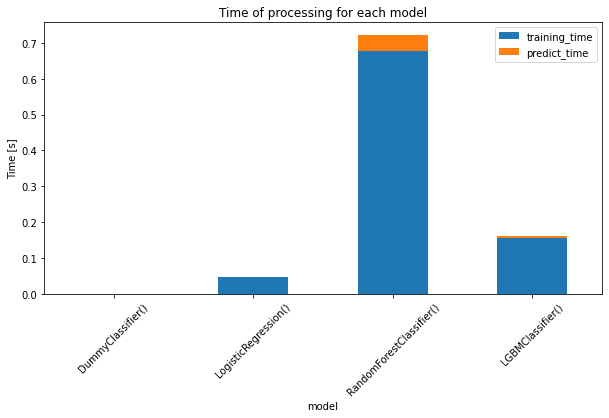

In [194]:
# arrange results together
df_results = pd.DataFrame([model_names, training_time, predicting_time, roc_auc_scores, f1_scores, acc_scores]).T
df_results.columns = ['model', 'training_time', 'predict_time', 'roc_auc_scores', 'f1_scores', 'acc_scores']
df_results

# plot bar chart of training and prediction time
df_results.plot(kind='bar', stacked=True, x='model', y=['training_time','predict_time'], figsize=(10,5), title='Time of processing for each model')
plt.ylabel('Time [s]')
plt.xticks(rotation=45);

We can see that all models in general are pretty fast, with both training and prediction time totalling 3 quarter second for even the "slowest" of the models, the random forest.

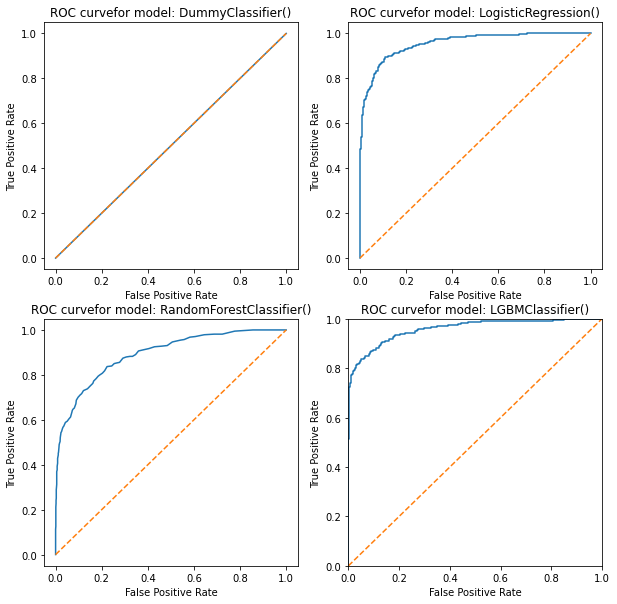

In [195]:
roc_curve_generate(fpr_vals, tpr_vals, model_names)



The Receiver operating characteristic (ROC) curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The lgbm is the closest to the top left corner while the senity check dummy model lays on the diagonal. 

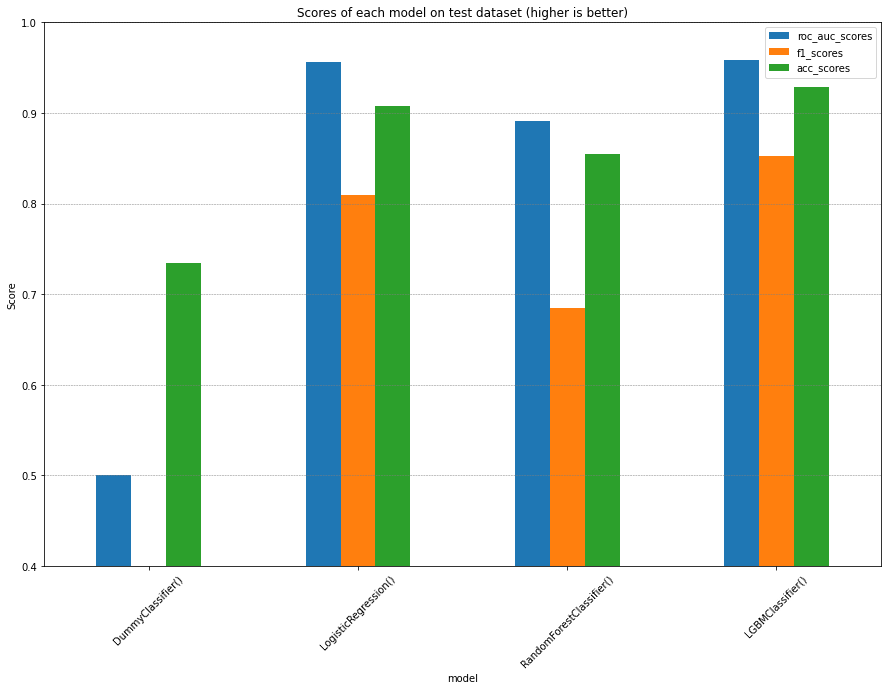

In [196]:
# plot bar chart of scores
df_results.plot(kind='bar', x='model', y=['roc_auc_scores', 'f1_scores', 'acc_scores'], figsize=(15,10), title='Scores of each model on test dataset (higher is better)')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5, axis='y')
plt.ylabel('Score')
plt.ylim(0.4,1)
plt.xticks(rotation=45);

In [197]:
df_results_tunning

,model,roc_auc_scores
0,LogisticRegression,0.958
1,RandomForestClassifier,0.891
2,LGBMClassifier,0.956


In [198]:
df_results

,model,training_time,predict_time,roc_auc_scores,f1_scores,acc_scores
0,DummyClassifier(),0.000418,0.000056,0.5,0.0,0.734564
1,LogisticRegression(),0.046603,0.000185,0.956188,0.809942,0.907736
2,RandomForestClassifier(),0.677067,0.04369,0.891689,0.685185,0.855216
3,LGBMClassifier(),0.156448,0.006307,0.958043,0.852555,0.928318


As mentioned above, due to the imbalanced labels, the accuracy score is problematic and this can be seen here, as the dummy model which just assigns the most common class as the prediction gives us an accuracy of 0.73. W''ll ignore the rest of the accuracy scores.

We can see all of our real models perform much better than the sanity check. We reached ~0.958 ROC-AUC score for the LGBMclassifier() model, which shows that it wasn't overfitted on the training/validation set. The score is even a little bit higher than it was on the training/validation set. The other two models also reached scores close to what they reached on the training/validation set.

Looking at the F1 scores, it follows the same order of results we saw as in ROC-AUC, the LGBM classifier takes the lead again, with ~0.85, while the other two models reach lower scores of ~0.81 and ~0.69.

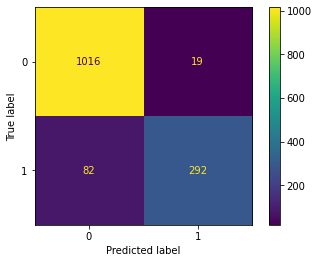

The recall score is: 0.781
The precision score is: 0.939
The f1 score is: 0.853


In [199]:
confusion_summery_f1(estimator, x_test_scaled, y_test)

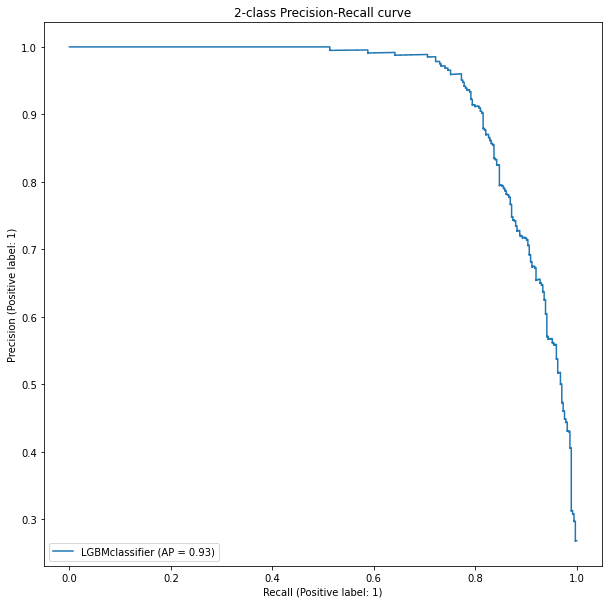

In [200]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    estimator, x_test_scaled, y_test, name="LGBMclassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [201]:
estimator

LGBMClassifier(learning_rate=0.17500000000000002, n_estimators=73,
               objective='binary', random_state=12345)

In [207]:
for th in np.arange(0, 1, 0.05):
  y_pred = (estimator.predict_proba(x_test_scaled)[:,1] >= th).astype(bool)
  # calculate scores
  f1_scores = f1_score(y_test, y_pred)
  recall_scores = recall_score(y_test, y_pred)
  precision_scores = precision_score(y_test, y_pred)

  print('Threshold is: {:.2f} | f1 is: {:.3f} | precision is: {:.3f} | recall is: {:.3f}'.format(
      th, f1_scores, precision_scores, recall_scores))


Threshold is: 0.00 | f1 is: 0.420 | precision is: 0.265 | recall is: 1.000
Threshold is: 0.05 | f1 is: 0.654 | precision is: 0.493 | recall is: 0.971
Threshold is: 0.10 | f1 is: 0.742 | precision is: 0.614 | recall is: 0.939
Threshold is: 0.15 | f1 is: 0.782 | precision is: 0.685 | recall is: 0.909
Threshold is: 0.20 | f1 is: 0.800 | precision is: 0.732 | recall is: 0.882
Threshold is: 0.25 | f1 is: 0.822 | precision is: 0.787 | recall is: 0.861
Threshold is: 0.30 | f1 is: 0.833 | precision is: 0.819 | recall is: 0.848
Threshold is: 0.35 | f1 is: 0.845 | precision is: 0.861 | recall is: 0.829
Threshold is: 0.40 | f1 is: 0.856 | precision is: 0.900 | recall is: 0.816
Threshold is: 0.45 | f1 is: 0.853 | precision is: 0.922 | recall is: 0.794
Threshold is: 0.50 | f1 is: 0.853 | precision is: 0.939 | recall is: 0.781
Threshold is: 0.55 | f1 is: 0.854 | precision is: 0.954 | recall is: 0.773
Threshold is: 0.60 | f1 is: 0.845 | precision is: 0.966 | recall is: 0.751
Threshold is: 0.65 | f1 i

From the confusion matrix we learn more about the prediction ability of the lgbm classifier. 

The precision is higher than the recall. 94% of observations we think led to churn are correct vs only 78% of the churned observation we spot right. 

It is interesting to know how much the company loose for every churn client and how much the company should spend with promotions and other marketing act to preserve tend to churn clients. The reason is we have a good ability to spot churn from observations we think reflects churn client but we lack in ability to spot all the churn clients. The model is too picky. 

Even if we don't know the exact rate it is obvious that the lifetime value of client is higher then the means of preserving customer. And therefore the best approach will be to fight on every client who tend to churn. With 78% recall we still have pretty good ability to spot churn clients, but it would be better to adjust the threshold for higher recall over precision. 

## Further analysing the predictions

In [203]:
preds = estimator.predict(x_test_scaled)

x_test_for_review = deepcopy(X_test)
x_test_for_review['predict_curn'] = preds.tolist()
x_test_for_review['real_curn'] = y_test

print('Sample of test observations with prediction and real churn')
x_test_for_review.sample(20)

print('')
print('All test observations where prediction and real churn dpnt match')
x_test_for_review.loc[x_test_for_review['predict_curn'] != x_test_for_review['real_curn'], :]

Sample of test observations with prediction and real churn


,paperless_billing,monthly_charges,total_charges,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,senior_citizen,partner,dependents,multiple_lines,Male,dsl,fiber_optic,type_One year,type_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,month,year,months_registered,predict_curn,real_curn
4420,0.0,69.35,1927.30,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,11.0,2017.0,27.790916,0,0
1821,0.0,85.30,2661.10,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2017.0,31.196952,1,1
3649,0.0,25.35,1847.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2014.0,72.881657,0,0
3538,0.0,100.20,7209.00,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,2014.0,71.946108,0,0
4782,0.0,78.75,426.35,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9.0,2019.0,5.413968,0,0
3166,0.0,48.80,664.40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2018.0,13.614754,0,0
3395,0.0,90.70,5586.45,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0,2014.0,61.592613,0,0
5555,0.0,19.80,1378.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,2014.0,69.633838,0,0
4724,1.0,80.05,4042.20,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,2015.0,50.495940,0,0
1598,0.0,19.55,520.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0,2017.0,26.626598,0,0



All test observations where prediction and real churn dpnt match


,paperless_billing,monthly_charges,total_charges,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,senior_citizen,partner,dependents,multiple_lines,Male,dsl,fiber_optic,type_One year,type_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,month,year,months_registered,predict_curn,real_curn
3995,1.0,74.90,2068.55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,2017.0,27.617490,0,1
3694,1.0,108.75,7156.20,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,5.0,2014.0,65.804138,0,1
624,0.0,20.00,137.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2019.0,6.880000,0,1
5483,1.0,77.75,4458.15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.0,2015.0,57.339550,0,1
1985,0.0,29.20,309.10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,2018.0,10.585616,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,0.0,79.90,3326.20,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,2016.0,41.629537,0,1
6680,1.0,95.50,4627.85,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,12.0,2015.0,48.459162,0,1
5471,1.0,74.20,1993.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,2017.0,26.863208,1,0
3243,1.0,39.70,710.05,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,2018.0,17.885390,1,0


# Conclusions and summary

Taking both the scores and the time and model complexity into account, the LGBM classifier is still the best model for Interconnect's needs. The time difference is neglectable for our purpose. It has the highest AUC-ROC score and the highest F1 and accuracy scores and while it takes longer to train/predict than the logistic regression model, we are still talking about less than half  a second which is insignificant compared to the added correctness of the predictions it generates.

To sum up, I downloaded the data, took a brief look at it and then:

* **Preprocessing**:
    * merged the different datasets into one based on `customer_id`
    * filled in missing data due to the merging
    * standardized column names to lowercase and underscore between words
    * created the `churn` 0/1 column based on `end_date`
        * noticed a 3:1 class imbalance in favor of the negative class
        * 11 observations had missing `total_charges` due to joining on the last day of the data, and were dropped

* **Exploratory data analysis**:
    * looked graphically at categorical feature differences in regards to churned status which showed us which features could be important in the modeling stage
    * analyzed the histograms of `begin_date`, `total_charges` and `monthly_charges` comparing between the churned statuses 
        * discovered churned users are usually more recent, had higher monthly charges and lower total charges
    * looked at the correlation matrix vs churn status to confirm the correlations, noticing the highest absolute Pearson correlation of features 1 to 1 vs churned status to be below 0.2.

* **Preparing data for supervised learning**:
    * engineered a few extra features which might be helpful
        * `months_registered` as the ratio of total charges to monthly charges, representing how long users were registered
        * `month` and `year` as features that might show seasonality in regards to churning
    * converted all Yes/No categorical features to 0/1 int types
    * converted `multiple lines` to a 0/1/2 value `num_lines` representing how many phone lines the user has
    * dropped unneeded columns (`customer_id`, `end_date`, `multiple_lines` and `begin_date`)
    * performed dummy encoding / OHE for the `gender`, `type`, `payment_method` and `internet_service` features
    * divided the data 4:1 between train/validation and test sets
    * prepared a pre-processing step for the modeling pipelines that scales all numerical features using StandardScaler() and produced synthetic observation to the minority positive class using SMOTE().

* **Modeling and hyperparameter tuning**:
    * created a helper function to perform the repetitive parts of hyperparameter tuning
    * tuned parameters for 3 different functions using randomsearch cross validation via 5 StratifiedKfold folds:
        * LogisticRegression: tuned the solver, penalty and  Inverse of regularization strength parameter.
        * RandomForestClassifier: tuned the max_features and n_estimators parameters
        * LGBMClassifier: tuned the boosting_type, learning_rate and n_estimators parameters
    * the LGBMClassifier model had the highest score with 0.96 maximum AUC-ROC score.

* **Testing the models**:
    * used the above optimal parameters train the models on the full training set
    * as a sanity check, added a DummyClassifier() that always predicts the most common class
    * noticed that in terms of learning and prediction time, RF > LGBM > LR, but all models took less than 1 second
    * achieved AUC-ROC scores of 0.958 for the LGBM model, with the next best model being RF and last LR
    * achieved F1 scores of \~0.685 for RF, \~0.808 for LR and \~0.853 for LGBM

In [204]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [205]:
!cp /content/drive/MyDrive/churn_gm/telecom_project_main_v3.ipynb ./

In [209]:
!jupyter nbconvert --to pdf telecom_project_main_v3.ipynb

[NbConvertApp] Converting notebook telecom_project_main_v3.ipynb to pdf
[NbConvertApp] Support files will be in telecom_project_main_v3_files/
[NbConvertApp] Making directory ./telecom_project_main_v3_files
[NbConvertApp] Making directory ./telecom_project_main_v3_files
[NbConvertApp] Making directory ./telecom_project_main_v3_files
[NbConvertApp] Making directory ./telecom_project_main_v3_files
[NbConvertApp] Making directory ./telecom_project_main_v3_files
[NbConvertApp] Making directory ./telecom_project_main_v3_files
[NbConvertApp] Making directory ./telecom_project_main_v3_files
[NbConvertApp] Making directory ./telecom_project_main_v3_files
[NbConvertApp] Making directory ./telecom_project_main_v3_files
[NbConvertApp] Making directory ./telecom_project_main_v3_files
[NbConvertApp] Making directory ./telecom_project_main_v3_files
[NbConvertApp] Making directory ./telecom_project_main_v3_files
[NbConvertApp] Writing 227173 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConv